<a href="https://colab.research.google.com/github/rwu331/streamlit_app/blob/main/Math_156_A2_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
# (a)

redwine = pd.read_csv('winequality-red.csv', sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [125]:
# (b)

# features
X = redwine.drop('quality', axis=1)
# response variable
y = redwine['quality']

# split data, test-train-val in 75%-15%-10%
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.4, random_state=42)

In [128]:
# (c)

# standardization
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)

# add intercept
X_train_new = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_new = np.c_[np.ones(X_test.shape[0]), X_test]

# compute closed-form solution (X^T X)^(-1) X^T y
w = np.linalg.inv(X_train_new.T @ X_train_new) @ X_train_new.T @ y_train

# predict
y_train_pred = X_train_new @ w
y_test_pred = X_test_new @ w

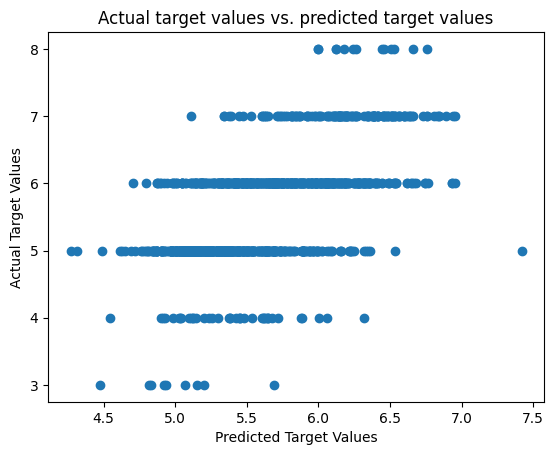

In [129]:
# (d)
plt.scatter(y_train_pred, y_train)
plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title('Actual target values vs. predicted target values')
plt.show()

To interpret this plot, we can see prediction errors since data points are scattered. Actual target value of 5, 6, and 7 have a large range of predicted values. For an actual target value of 5, the predicted values could lie between 4.3 to 7.5. For an actual target value of 8, the predicted values could lie between 5.8 to 6.8, which has a smaller range of prediction. These observations indicate possible deviations, and the model could be optimized to achieve better predictions.

In [130]:
# (e)

# compute root-mean-square
def rmse(y_actual, y_pred):
  n = len(y_actual) # number of data
  se = (y_actual-y_pred) ** 2 # squared error
  mse = sum(se) / n # mean squared error
  rmse = np.sqrt(mse) # root mean square
  return rmse

# train set rmse
train_rmse = rmse(y_train, y_train_pred)

# test set rmse
test_rmse = rmse(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 0.6537726276403216
Test RMSE: 0.611498991807556


In [132]:
# (f)
# initialize w_0
np.random.seed(41)
w_0 = np.random.randn(X_train_new.shape[1])

# initialize hyperparameters
learning_rate = 0.01
K = 2000
n = len(y_train)  # number of samples

for k in range(K):
  # shuffle train data
  shuffle = np.random.permutation(n)
  X_shuffled = X_train_new[shuffle]
  y_shuffled = y_train.iloc[shuffle].values

  # iterate though all train data
  for i in range(n):
    X_sample = X_shuffled[i, :]
    y_sample = y_shuffled[i]

    # predict
    y_train_pred_lms = X_sample @ w_0

    # calculate rror
    error = y_train_pred_lms - y_sample

    # update w_0
    w_0 -= learning_rate * error * X_sample

# predict using newest w
y_test_pred_lms = X_test_new @ w_0



In [133]:
# (g)

# train set rmse
lms_train_rmse = rmse(y_train, y_train_pred_lms)

# test set rmse
lms_test_rmse = rmse(y_test, y_test_pred_lms)

print(f"Train RMSE: {lms_train_rmse}")
print(f"Test RMSE: {lms_test_rmse}")

Train RMSE: 0.8463726934033005
Test RMSE: 0.6298050909085644
